<h1> Checkpoint:</h1>

**Looking to see completetion and effort in completing the checkpoint. It's okay if it's not correct**

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import numpy, pandas, matplotlib, and seaborn

(Feel free to import other libraries!)

In [373]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sb;

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [374]:
df = pd.read_csv('../data/states_edu.csv')

You should always familiarize yourself with what each column in the dataframe represents. \ Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [375]:
# let's rename our columns to make them more intuitive
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
#inplace return copy of dataframe

df.dropna()
df.dropna(subset=['AVG_READING_8_SCORE'], inplace=True)

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: **<Math/Reading for 4/8 grade>**   (Ex. Math for 8th grade)

**(hit `Enter` to edit)**

Outcome Score in the questions refers to the outcome variable you chose here.

How many different years of data are in our dataset? Use a pandas function.

In [376]:
df["YEAR"].unique()
#only the following years have reading 8 score data

array([1998, 2002, 2003, 2005, 2007, 2009, 2011, 2013, 2015, 2017, 1992,
       1994, 2019])

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

Text(0.5, 1.0, '8th grade reading score over time, by state')

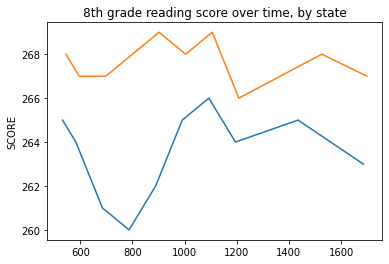

In [377]:
grp_state = df.groupby('STATE')
#print(grp_state.get_group("MICHIGAN"))
grp_state.get_group("MICHIGAN").AVG_READING_8_SCORE.plot()
grp_state.get_group("OHIO").AVG_READING_8_SCORE.plot()
plt.ylabel('SCORE')
plt.title('8th grade reading score over time, by state')
#the orange color is the OHIO state, while the blue one is the MICHIGAN state

Find the average for your outcome score across all states in 2019

Text(0.5, 1.0, 'the avg 8th grade reading score over states in 2019')

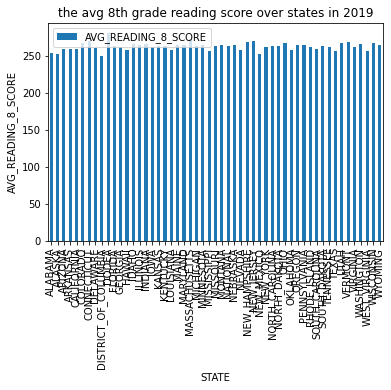

In [378]:
grp_year = df.groupby('YEAR')
# grp_year.get_group(2019).AVG_READING_8_SCORE
#print(grp_year.get_group(2019))
grp_year.get_group(2019).plot.bar(x="STATE",y="AVG_READING_8_SCORE")
plt.ylabel('AVG_READING_8_SCORE')
plt.title('the avg 8th grade reading score over states in 2019')

Find the maximum outcome score for every state. Hint: there's a function that allows you to do this easily

In [379]:
grp_state= df.groupby('STATE')
grp_state.AVG_READING_8_SCORE.max()
# plt.ylabel('AVG_READING_8_SCORE')
# plt.title('the max avg 8th grade reading score over states')

STATE
ALABAMA                 259.0
ALASKA                  261.0
ARIZONA                 263.0
ARKANSAS                262.0
CALIFORNIA              263.0
COLORADO                271.0
CONNECTICUT             275.0
DELAWARE                267.0
DISTRICT_OF_COLUMBIA    250.0
DODEA                   280.0
FLORIDA                 267.0
GEORGIA                 266.0
HAWAII                  261.0
IDAHO                   270.0
ILLINOIS                267.0
INDIANA                 272.0
IOWA                    269.0
KANSAS                  269.0
KENTUCKY                270.0
LOUISIANA               257.0
MAINE                   271.0
MARYLAND                274.0
MASSACHUSETTS           278.0
MICHIGAN                266.0
MINNESOTA               271.0
MISSISSIPPI             256.0
MISSOURI                268.0
MONTANA                 273.0
NATIONAL                268.0
NEBRASKA                270.0
NEVADA                  262.0
NEW_HAMPSHIRE           275.0
NEW_JERSEY              276.0
NEW_

<h2> Feature Selection </h2>

After exploring the data, you now have to choose features that you would use to predict the performance of the students on a chosen test (chosen outcome variable). By the way, you can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features

In [380]:
#I am interested in how would the revenue per student affect the score
df['REVENUE_PER_STUDENT'] = df['TOTAL_REVENUE'] / df['ENROLL_ALL']
df.dropna(subset=['TOTAL_REVENUE'], inplace=True)
df.dropna(subset=['ENROLL_ALL'], inplace=True)

Final feature list: **<REVENUE_PER_STUDENT\>**

Feature selection justification: **<I am interested in how would the revenue per student affect the score\>**

<h2>Visualization</h2>

Use any graph you wish to see the relationship of your chosen outcome variable with any features you chose

**Visualization 1**

Text(0.5, 1.0, 'the mean avg 8th grade base on revenue per student')

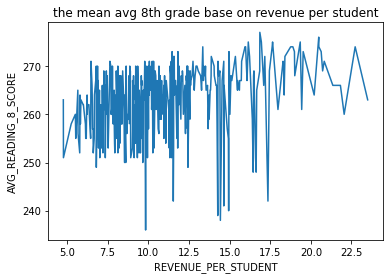

In [381]:
df.groupby('REVENUE_PER_STUDENT').AVG_READING_8_SCORE.mean().plot()
plt.ylabel('AVG_READING_8_SCORE')
plt.title('the mean avg 8th grade base on revenue per student')

**<the plot for the mean avg 8th grade base on revenue per student>**

**Visualization 2**

Text(0, 0.5, 'AVG_READING_8_SCORE')

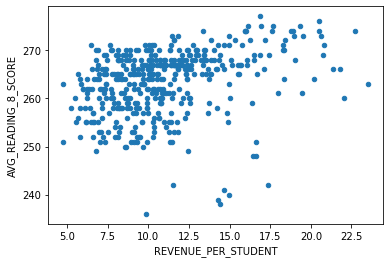

In [382]:
df.plot.scatter(x='REVENUE_PER_STUDENT',y='AVG_READING_8_SCORE')
plt.xlabel('REVENUE_PER_STUDENT')
plt.ylabel('AVG_READING_8_SCORE')

**<the scatter plot for the mean avg 8th grade base on revenue per student>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [383]:
from sklearn.model_selection import train_test_split

In [384]:
X = df[['TOTAL_REVENUE','ENROLL_8','REVENUE_PER_STUDENT','YEAR']].dropna()
y = df.loc[X.index]['AVG_READING_8_SCORE']>260

In [385]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

ML Models Resource: https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a

Chosen ML task: **<REGRESSION/CLASSIFICATION>**

In [386]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [387]:
# create your model here
model = LinearRegression()

In [388]:
model.fit(X_train, y_train)

LinearRegression()

In [389]:
y_pred = model.predict(X_test)

/home/borenke/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


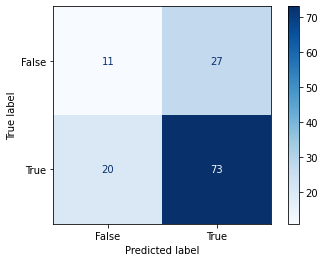

In [390]:
# FOR CLASSIFICATION ONLY:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test,
                         cmap=plt.cm.Blues)

/home/borenke/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'AVG Reading 8 score')

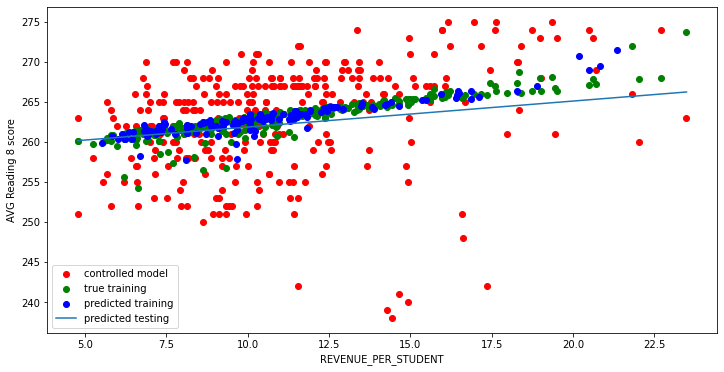

In [391]:

# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.
X = df[['TOTAL_REVENUE','ENROLL_8','REVENUE_PER_STUDENT','YEAR']].dropna()
y = df.loc[X.index]['AVG_READING_8_SCORE']

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.3, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

col_name = 'REVENUE_PER_STUDENT'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('AVG Reading 8 score')




<h2> Summary </h2>

**<I don't have a thorough understanding of what is going for the classification model, therefore I am going to summarize only the linear regression data. As we can see from the graph above, the predicted line has a slightly positive slope, yet almost a horizontal line. This shows that the REVENUE_PER_STUDENT and AVG_READING_8_SCORE only has a weak positive relationship\>**